<a href="https://colab.research.google.com/github/francosuriano/ML2022/blob/main/Ej_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se trabajó sobre un dataset de cancer mamario de Wisconsin.

In [7]:
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import sklearn as sklearn
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Lectura del dataset

df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
# Eliminamos columnas irrelevantes como: 'id', 'unnamed'

df = df.drop(['Unnamed: 32','id'], 1)
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


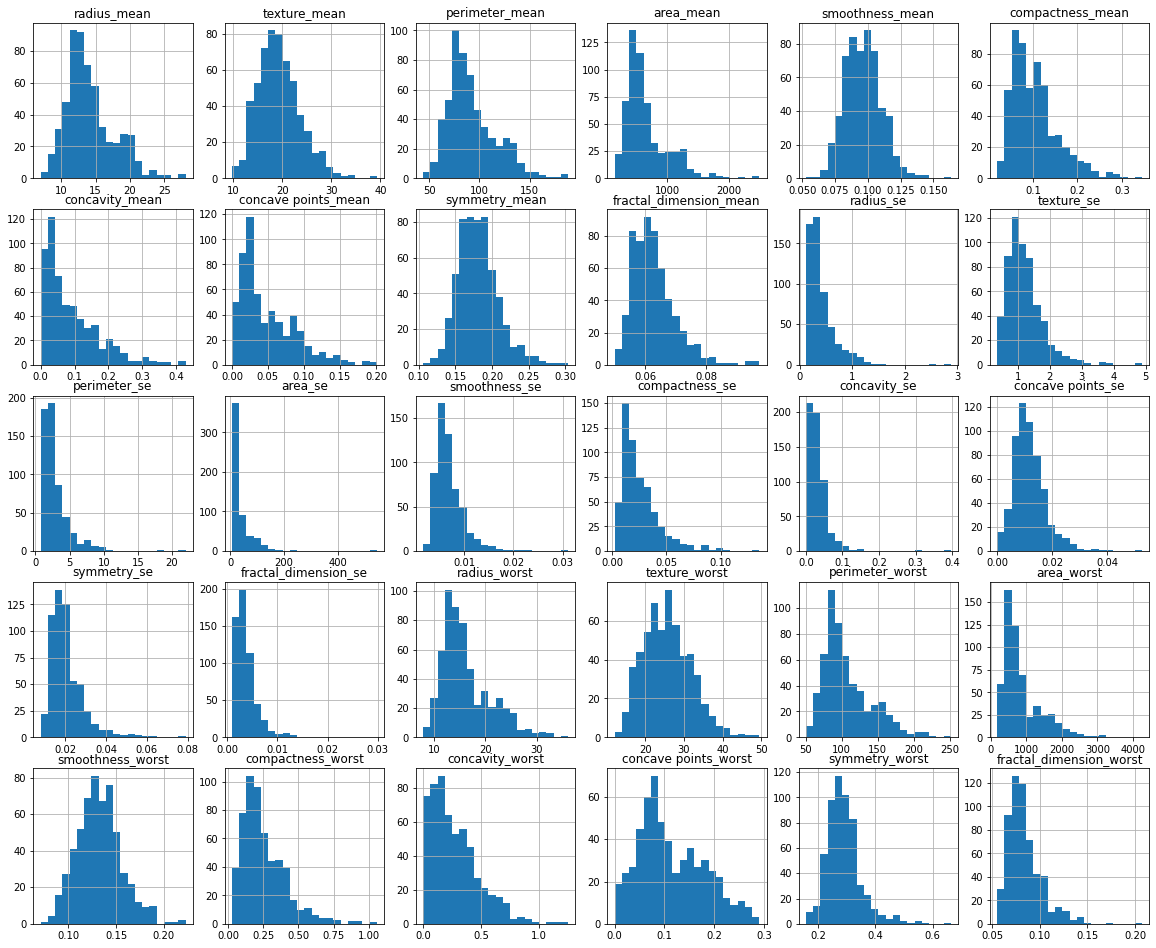

In [10]:
# Dibujamos los histogramas de los features para observar las distribuciones de cada uno.

def dibujar_histo(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name)
        print()
    plt.show()

df_features = df.drop(['diagnosis'], 1)
df_target = df['diagnosis']

dibujar_histo(df,df_features,6,6)


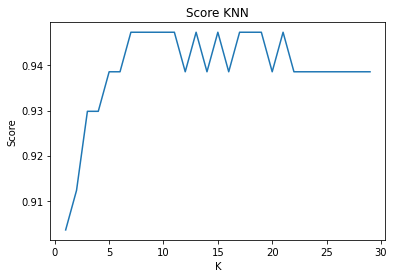

In [11]:
# Primer clasificador: KNN para Dataset original (sin quitar features)
# Prueba para varios k

vecinos = np.arange(1, 30)
score = np.empty(len(vecinos))

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=20)

for i, k in enumerate(vecinos):
    # se entrena en cada iteracion 
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # y se evalua el score sobre el conjunto de testeo
    score[i] = knn.score(X_test, y_test)

plt.title('Score KNN')
plt.plot(vecinos,score)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()



In [12]:
# Elegimos el número de vecinos que determina el máximo score: (si hay varios, se muestra el menor)

max_k = max(score)
k = min([index for index, item in enumerate(score) if item == max_k])
print('numero de vecinos óptimo:' , k,'. Score logrado: ', max_k)

numero de vecinos óptimo: 6 . Score logrado:  0.9473684210526315


In [14]:
# Modelo final con el k que maximiza el score

# llamada al modelo de entrenamiento
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Reporte automático de métricas
 
target_pred = y_test
target_exp = knn.predict(X_test)
print(classification_report(target_exp, target_pred))

# Calculamos también la matriz de confusión:

print('Matriz de confusion: ')
print(sklearn.metrics.confusion_matrix(target_exp, target_pred))

              precision    recall  f1-score   support

           B       0.98      0.92      0.95        71
           M       0.88      0.98      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114

Matriz de confusion: 
[[65  6]
 [ 1 42]]


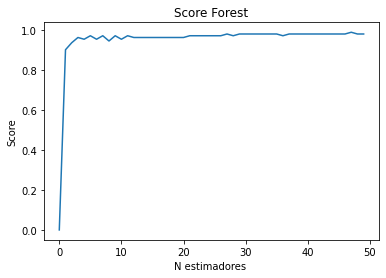

In [18]:
# Clasificador Random Forest

# Prueba para varios N-estimadores

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=20)
alfa = 50
score = np.zeros(alfa)

for i in range(1,alfa):
    # se entrena en cada iteracion 
    forest = RandomForestClassifier(criterion='entropy', n_estimators=i, random_state=1, n_jobs=2)
    forest.fit(X_train, y_train)
    # y se evalua el score sobre el conjunto de testeo
    score[i] = forest.score(X_test, y_test)

plt.title('Score Forest')
plt.plot(score)
plt.xlabel('N estimadores ')
plt.ylabel('Score')
plt.show()

In [19]:
# Clasificador Random forest con el mejor N-estimador:

# Elegimos el número de vecinos que determina el máximo score: (si hay varios, se muestra el menor)

max_score = max(score)
N = min([index for index, item in enumerate(score) if item == max_score])
print('N- estimador con mayor Score: ',N)

forest = RandomForestClassifier(criterion='entropy', n_estimators=N, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

N- estimador con mayor Score:  47
Accuracy: 0.991


Observamos que el clasificador de Random Forest resulta mejor que el KNN. Obteniendo un Score de 0.99 contra un 0.94. Sin embargo, se observan que con ambos métodos se obtienen muy buenos resultados. 
Además, se observa que para KNN, mediante los ensayos realizados, el rango optimo resulta entre K=7 y K=20.  
Por otro lado, se observa para Random Forest que (salvo para los primeros K) el score resulta muy alto y no varía demasiado cuando se modifican los N-estimadores, por lo que pueden elegirse valores bajos y obtener buenos resultados.